In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

x = boston.data
y = boston.target

In [4]:
import pandas as pd 
df = pd.DataFrame(x)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
# Normalise this dataset
# Each feature must have 0 mean, unit variance

import numpy as np
u = np.mean(x, axis=0)
std = np.std(x, axis=0)

In [7]:
x = (x - u)/std

In [8]:
pd.DataFrame(x[:5, :])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


##Linear Regression on Multiple Features

In [9]:
x.shape, y.shape

((506, 13), (506,))

In [10]:
ones = np.ones((x.shape[0], 1))
x = np.hstack((ones, x))
print(x.shape)

(506, 14)


In [11]:
# X - Matrix ( m x n)
# x - Vector (Single Example with n features)

def hypothesis(x, theta):
    y_ = 0.0
    n = x.shape[0]
    
    for i in range(n):
        y_ += (theta[i]*x[i])

    return y_

In [12]:
def error(x, y, theta):
    e = 0.0
    n = x.shape[0]

    for i in range(n):
        y_ = hypothesis(x[i], theta)
        e += (y_ - y[i])**2

    return e/n

In [13]:
def gradient(x, y, theta):
    m, n = x.shape
    grad = np.zeros((n, ))

    # for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(x[i], theta)
            grad[j] += (y_ - y[i]) * x[i][j]

    return grad / m

In [20]:
def gradientDescent(x, y, learningRate = 0.1, maxEpochs = 100):
    m, n = x.shape
    theta = np.zeros((n, ))
    errorList = []

    for i in range(m):
        e = error(x, y, theta)
        errorList.append(e)

        #Gradient Descent
        grad = gradient(x, y, theta)
        for j in range(n):
            theta[j] = theta[j] - learningRate * grad[j]

    return theta, errorList

In [21]:
import time
start = time.time()
theta, errorList = gradientDescent(x, y)
end = time.time()
print('Time taken: ', end - start)

Time taken:  52.20912027359009


In [22]:
print(theta)

[ 2.25328063e+01 -9.21908248e-01  1.07061708e+00  1.07110150e-01
  6.86566906e-01 -2.05042733e+00  2.68044189e+00  1.42083527e-02
 -3.10621816e+00  2.57696468e+00 -1.98003188e+00 -2.05736602e+00
  8.48690358e-01 -3.74033084e+00]


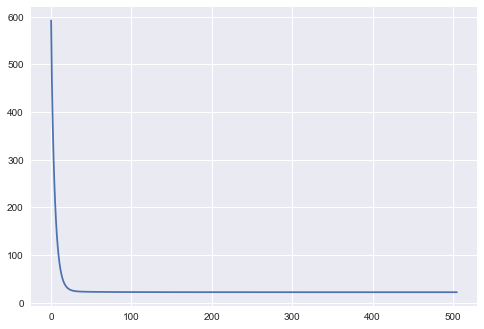

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(errorList)
plt.show()

##Predictions

In [24]:
y_ = []
m = x.shape[0]

for i in range(m):
    pred = hypothesis(x[i],theta)
    y_.append(pred)
y_ = np.array(y_)

R2 Score

In [25]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [26]:
# SCORE
r2_score(y,y_)

74.06290584903215

#Optimising Code using Vectorization

An Efficent Implemenation for Linear Regression using Vectorization

1. Avoid loops in the implemenation, except gradient descent main loop

2. Use numpy functions like np.sum(), np.dot() which are quite fast and already optimised

In [27]:
def hypothesis(x,theta):
    return np.dot(x,theta)


In [28]:
def error(x,y,theta):
    m = x.shape[0]
    e = 0.0
    y_ = hypothesis(x,theta)
    e = np.sum((y-y_)**2)
    
    return e/m

In [29]:
def gradient(x,y,theta):
    
    y_ = hypothesis(x,theta)
    grad = np.dot(x.T,(y_ - y))
    m = x.shape[0]
    return grad/m

In [30]:
def gradientDescent(x,y,learningRate = 0.1,maxIters=300):
    
    n = x.shape[1]
    theta = np.zeros((n,))
    errorList = []
    
    for i in range(maxIters):
        e = error(x,y,theta)
        errorList.append(e)
        
        #Gradient descent
        grad = gradient(x,y,theta)
        theta = theta - learningRate*grad
        
    return theta,errorList

In [31]:
start = time.time()
theta, errorList = gradientDescent(x, y)
end = time.time()
print('Time taken: ', end - start)

Time taken:  0.14469695091247559


In [32]:
print(theta)

[ 2.25328063e+01 -9.21908248e-01  1.07061708e+00  1.07110150e-01
  6.86566906e-01 -2.05042733e+00  2.68044189e+00  1.42083527e-02
 -3.10621816e+00  2.57696468e+00 -1.98003188e+00 -2.05736602e+00
  8.48690358e-01 -3.74033084e+00]


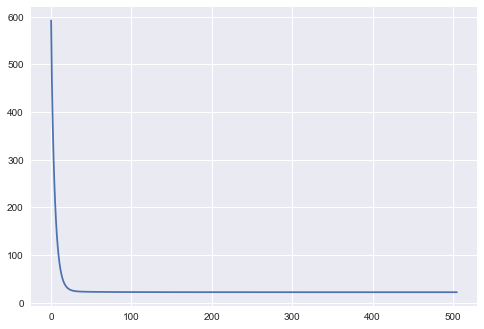

In [33]:
plt.plot(errorList)
plt.show()

In [34]:
## Predictions
y_ = hypothesis(x,theta)
r2_score(y,y_)

74.06290584903215